In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
print("DONE")

Using TensorFlow backend.


DONE


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("DONE")

170500096/170498071 [==============================] - 20s 0us/step
DONE


In [4]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

#print(test_images)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
print("DONE")

Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]
DONE


DONE


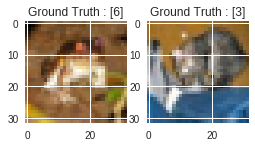

In [4]:
plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))
print("DONE")

In [5]:
# Find the shape of input images and create the variable input_shape
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data  = test_images.reshape (test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
print("DONE")

DONE


In [6]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [7]:
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    print("DONE")

DONE


In [0]:
model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [8]:
batch_size = 256
epochs = 45
print("DONE")


DONE


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/45
 4096/50000 [=>............................] - ETA: 3:38 - loss: 2.3738 - acc: 0.1206

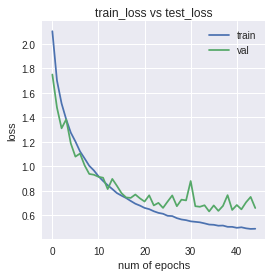

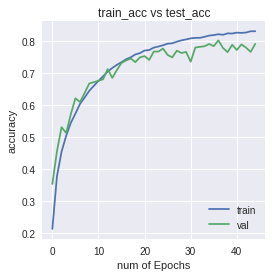

In [0]:
# Graph losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

##############################################
plt.figure(1,figsize=(4,4))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)

plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs test_loss')

plt.grid(True)
plt.legend(['train','val']) 

##################################################

plt.figure(2,figsize=(4,4))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)

plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs test_acc')

plt.grid(True)
plt.legend(['train','val'],loc=4)

In [0]:
model.evaluate(test_data, test_labels_one_hot)
print('DONE')

10000/10000 [==============================] - 2s 175us/step
DONE


In [0]:
vgg16_model = keras.applications.vgg16.VGG16()
print("DONE")

553467904/553467096 [==============================] - 13s 0us/step
DONE


In [0]:
vgg16_model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model1= Sequential()
for layer in vgg16_model.layers:
    model1.add(layer)
print("DONE")

DONE


In [0]:
model1.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [0]:
model1.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [0]:
model1.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
epochs1 = 5
print("DONE")

DONE


In [0]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs1, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 220us/step - loss: 0.4520 - acc: 0.8447 - val_loss: 0.6539 - val_acc: 0.7859
Epoch 2/5
50000/50000 [==============================] - 11s 216us/step - loss: 0.4568 - acc: 0.8429 - val_loss: 0.8320 - val_acc: 0.7694
Epoch 3/5
13056/50000 [======>.......................] - ETA: 7s - loss: 0.4654 - acc: 0.8434

50000/50000 [==============================] - 11s 218us/step - loss: 0.4563 - acc: 0.8448 - val_loss: 0.6057 - val_acc: 0.8085
Epoch 4/5
50000/50000 [==============================] - 11s 218us/step - loss: 0.4548 - acc: 0.8444 - val_loss: 0.7381 - val_acc: 0.7705
Epoch 5/5
32768/50000 [==================>...........] - ETA: 3s - loss: 0.4499 - acc: 0.8480

50000/50000 [==============================] - 11s 217us/step - loss: 0.4534 - acc: 0.8453 - val_loss: 0.6728 - val_acc: 0.8039
DONE


In [0]:
vgg19_model = keras.applications.vgg19.VGG19(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)
print("DONE")

574717952/574710816 [==============================] - 6s 0us/step
DONE


In [0]:
vgg19_model.summary()
print("DONE")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
type(vgg19_model)
#print("DONE")

keras.engine.training.Model

In [0]:
model2= Sequential()
for layer in vgg19_model.layers:
    model2.add(layer)
print("DONE")

DONE


In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model2.layers.pop()
print("DONE")

DONE


In [0]:
model2.summary()
print("DOne")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
for layer in model1.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [0]:
model2.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [0]:
model2.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
epochs2 = 5
print("DONE")

DONE


In [0]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs2, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 218us/step - loss: 0.4489 - acc: 0.8482 - val_loss: 0.5999 - val_acc: 0.8140
Epoch 2/5
50000/50000 [==============================] - 11s 216us/step - loss: 0.4488 - acc: 0.8481 - val_loss: 0.6720 - val_acc: 0.8001
Epoch 3/5
12288/50000 [======>.......................] - ETA: 7s - loss: 0.4474 - acc: 0.8472

50000/50000 [==============================] - 11s 215us/step - loss: 0.4427 - acc: 0.8503 - val_loss: 0.6025 - val_acc: 0.8150
Epoch 4/5
50000/50000 [==============================] - 11s 215us/step - loss: 0.4409 - acc: 0.8486 - val_loss: 0.6625 - val_acc: 0.7972
Epoch 5/5
32000/50000 [==================>...........] - ETA: 3s - loss: 0.4404 - acc: 0.8502

50000/50000 [==============================] - 11s 216us/step - loss: 0.4415 - acc: 0.8509 - val_loss: 0.6446 - val_acc: 0.8095
DONE


In [0]:
mobilenet_model = keras.applications.mobilenet.MobileNet()
print("DONE")

17227776/17225924 [==============================] - 1s 0us/step
DONE


In [0]:
mobilenet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [0]:
type(mobilenet_model)
#print("DONE")

keras.engine.training.Model

In [0]:
model3= Sequential()
for layer in mobilenet_model.layers:
    model3.add(layer)
print("DONE")

DONE


In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [0]:
model3.layers.pop()
print("DONE")

DONE


In [0]:
model3.summary()
print("DOne")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [0]:
for layer in model3.layers: ## MAking trainable= FALSE (FREEZING)
    layer.trainable = False
print("DONE")

DONE


In [0]:
model3.add(Dense(10, activation='softmax'))
print("DoNE")

DoNE


In [0]:
model3.summary()
print('DONE')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 226, 226, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (Activation)      (None, 112, 112, 32)      0         
_________________________________________________________________
conv_pad_1 (ZeroPadding2D)   (None, 114, 114, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
__________

In [0]:
epochs3 = 5
print("DONE")

DONE


In [0]:
model3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(train_data, train_labels_one_hot, batch_size=batch_size, epochs=epochs3, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))
print("DONE")

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 228us/step - loss: 0.4439 - acc: 0.8498 - val_loss: 0.7019 - val_acc: 0.7997
Epoch 2/5
50000/50000 [==============================] - 11s 218us/step - loss: 0.4529 - acc: 0.8478 - val_loss: 0.5876 - val_acc: 0.8114
Epoch 3/5
12032/50000 [======>.......................] - ETA: 7s - loss: 0.4349 - acc: 0.8540

50000/50000 [==============================] - 11s 221us/step - loss: 0.4473 - acc: 0.8493 - val_loss: 0.6550 - val_acc: 0.8034
Epoch 4/5
50000/50000 [==============================] - 11s 220us/step - loss: 0.4511 - acc: 0.8484 - val_loss: 0.6017 - val_acc: 0.8033
Epoch 5/5
32768/50000 [==================>...........] - ETA: 3s - loss: 0.4475 - acc: 0.8492

50000/50000 [==============================] - 11s 221us/step - loss: 0.4494 - acc: 0.8484 - val_loss: 0.7174 - val_acc: 0.7721
DONE
